In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import os

In [6]:
dataset_folder = os.getcwd()+'\\Img\\'
print(dataset_folder)

d:\Sergio\Documents\GitHub\Orange_image_augmentation\Img\


# Utilidades

In [7]:
def count_files(folder):
    print(f"{folder.upper()}: ", len(os.listdir(dataset_folder+folder)))

In [9]:
import sys
import os
from colorama import Fore as color

def progress_bar(actual_value,
                 max_value,
                 size_bar=50,
                 character='■',
                 initial_message="Progress:",
                 end_message='',
                 error_indicator=False):
    percent = actual_value / max_value
    message = '\r' + initial_message + ' [{0:' + str(size_bar) + 's}] {1:6d}/{2:1d} ' + end_message
    if percent < 1:
        if error_indicator:
            sys.stdout.write(
                color.LIGHTRED_EX + message.format(character * int(size_bar * percent), actual_value, max_value))
        else:
            sys.stdout.write(
                color.LIGHTYELLOW_EX + message.format(character * int(size_bar * percent), actual_value, max_value))
        sys.stdout.flush()
    else:
        sys.stdout.write(color.BLUE + message.format(character * int(size_bar * percent), actual_value, max_value))
        sys.stdout.flush()

    if percent == 1: print(color.RESET)
    # Formato:
    # initial_message [■■■■■■■■                                          ]    230/151100 end_message

def get_files(folder, extension=None):
    # folder, subfolders, files
    folder, _, files = list(os.walk(folder))[0]  # Solo obtenemos datos de la carpeta especificada como argumento
    if not (extension is None):
        files = [f for f in files if f.endswith(extension)]
    return folder, files


# Test del operaciones en las imagenes

In [12]:
# Paso 1: Leer una imagen a color con OpenCV
imagen_original = cv2.imread(dataset_folder+'deforme/real_orange__entire__one__white_background__no_ref_C3G4YQ25.jpeg', cv2.IMREAD_COLOR)

# Paso 2: Rotar la imagen 10° en sentido horario
angulo_rotacion = -10  # Sentido horario
filas, columnas = imagen_original.shape[:2]
matriz_rotacion_hor = cv2.getRotationMatrix2D((columnas / 2, filas / 2), angulo_rotacion, 1)
imagen_rotada_hor = cv2.warpAffine(imagen_original, matriz_rotacion_hor, (columnas, filas), borderValue=(248, 248, 248))


angulo_rotacion = 10  # Sentido anti-horario
filas, columnas = imagen_original.shape[:2]
matriz_rotacion_antihor = cv2.getRotationMatrix2D((columnas / 2, filas / 2), angulo_rotacion, 1)
imagen_rotada_antihor = cv2.warpAffine(imagen_original, matriz_rotacion_antihor, (columnas, filas), borderValue=(248, 248, 248))

# Paso 2: Aplicar un flip (espejo) a la imagen
imagen_flip = cv2.flip(imagen_original, 1)  # 1 indica el eje horizontal


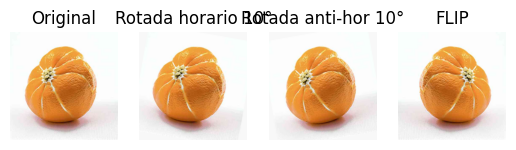

In [13]:
# Paso 3: Mostrar por pantalla la imagen original y la modificada
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(imagen_rotada_hor, cv2.COLOR_BGR2RGB))
plt.title('Rotada horario 10°')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(imagen_rotada_antihor, cv2.COLOR_BGR2RGB))
plt.title('Rotada anti-hor 10°')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(imagen_flip, cv2.COLOR_BGR2RGB))
plt.title('FLIP')
plt.axis('off')

plt.show()

# Renombrar los archivos a forma numérica reconocible

In [15]:
# Definir la ruta de la carpeta
folders = ['deforme', 'hoja_izquierda', 'hoja_derecha', 'no_hojas']
for folder in folders:
    ruta = dataset_folder+folder+'/'

    # Listar los archivos en la carpeta
    archivos = os.listdir(ruta)

    # Filtrar solo los archivos de imagen (puedes agregar más extensiones si es necesario)
    archivos_imagen = [archivo for archivo in archivos if archivo.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # Ordenar los archivos de imagen
    #archivos_imagen.sort()

    # Contador para generar nombres únicos
    contador = 1

    # Procesar y renombrar los archivos
    for archivo in archivos_imagen:
        nombre_nuevo = f'{folder}_{contador:04d}'
        ruta_archivo_antigua = os.path.join(ruta, archivo)
        ruta_archivo_nueva = os.path.join(ruta, f'{nombre_nuevo}.jpeg')  # Cambiar la extensión si es necesario
        os.rename(ruta_archivo_antigua, ruta_archivo_nueva)
        contador += 1

        progress_bar(actual_value=contador-1,
                    max_value=len(archivos_imagen),
                    size_bar=50,
                    character='■',
                    initial_message="Progreso:",
                    end_message='Carpeta: '+folder,
                    error_indicator=False)

    print(f"Se han renombrado {contador-1} archivos.\n")

Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2290/2290 Carpeta: deforme
Se han renombrado 2290 archivos.

Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   1049/1049 Carpeta: hoja_izquierda
Se han renombrado 1049 archivos.

Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    495/495 Carpeta: hoja_derecha
Se han renombrado 495 archivos.

Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   4105/4105 Carpeta: no_hojas
Se han renombrado 4105 archivos.



# Operaciones de flip y rotación


## Flip

In [16]:
def aplicar_flip_en_carpeta(izquierda, derecha):
    """
    Aplica un flip horizontal a todas las imágenes en una carpeta y las guarda en otra carpeta.
    Solo se aplicará en hoja_izquierda y hoja_derecha. Será un flip intercambiado.

    Args:
        izquierda (str): Ruta de las imágeners con hojas a la izquierda.
        derecha (str, optional): Ruta de las imágenes con hojas a la derecha
    """

    # Asegurarse de que las rutas tengan un "/" al final
    if not izquierda.endswith('/'):
        izquierda += '/'
    if not derecha.endswith('/'):
        derecha += '/'

    # Obtener la lista de archivos de imagen en la carpeta de lectura
    archivos_img_izquierda = [archivo for archivo in os.listdir(izquierda) if archivo.lower().endswith(('.jpg', '.png', '.jpeg'))]
    archivos_img_derecha = [archivo for archivo in os.listdir(derecha) if archivo.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # Iterar sobre los archivos, aplicar el flip y guardar en la carpeta de guardado
    # Flip en archivos de izquierda. Augmentation para derecha
    contador=1
    for archivo in archivos_img_izquierda:
        ruta_archivo_lectura = os.path.join(izquierda, archivo)
        ruta_archivo_guardado = os.path.join(derecha, 'flipped_'+archivo)

        imagen_original = cv2.imread(ruta_archivo_lectura)
        imagen_flipped = cv2.flip(imagen_original, 1)  # Flip horizontal

        cv2.imwrite(ruta_archivo_guardado, imagen_flipped)
        contador+=1
        progress_bar(actual_value=contador-1,
                    max_value=len(archivos_img_izquierda),
                    initial_message="Progreso:",
                    end_message='Archivos de izquierda a derecha',
                    )

    # Flip en archivos de derecha. Augmentation para izquierda
    contador=1
    for archivo in archivos_img_derecha:
        ruta_archivo_lectura = os.path.join(derecha, archivo)
        ruta_archivo_guardado = os.path.join(izquierda, 'flipped_'+archivo)

        imagen_original = cv2.imread(ruta_archivo_lectura)
        imagen_flipped = cv2.flip(imagen_original, 1)  # Flip horizontal

        cv2.imwrite(ruta_archivo_guardado, imagen_flipped)
        contador+=1
        progress_bar(actual_value=contador-1,
                    max_value=len(archivos_img_derecha),
                    initial_message="Progreso:",
                    end_message='Archivos de derecha a izquierda',
                    )


## Rotación

In [46]:
def aplicar_rotacion_en_carpeta(angulo, lectura, guardado=None, porcentaje_aplicable=1):
    """
    Aplica un flip horizontal a todas las imágenes en una carpeta y las guarda en otra carpeta.

    Args:
        lectura (str): Ruta de la carpeta de lectura.
        guardado (str, optional): Ruta de la carpeta de guardado. Si no se proporciona, se usará la misma que la de lectura.
    """
    if guardado is None:
        guardado = lectura

    # Asegurarse de que las rutas tengan un "/" al final
    if not lectura.endswith('/'):
        lectura += '/'
    if not guardado.endswith('/'):
        guardado += '/'

    # Obtener la lista de archivos de imagen en la carpeta de lectura
    archivos_imagen = [archivo for archivo in os.listdir(lectura) if archivo.lower().endswith(('.jpg', '.png', '.jpeg'))]

    total = len(archivos_imagen)
    if porcentaje_aplicable!=1:
        n_elegibles = int(total*porcentaje_aplicable)+1
        elegidas = random.sample(range(total), n_elegibles)
        archivos_imagen = np.array(archivos_imagen)[elegidas].tolist()

    # Iterar sobre los archivos, aplicar el flip y guardar en la carpeta de guardado
    contador = 1
    for archivo in archivos_imagen:
        if contador == 1000: 
            progress_bar(actual_value=contador-1,
                        max_value=len(archivos_imagen),
                        initial_message="Progreso: ⌛",
                        end_message='Archivos de derecha a izquierda',
                        )
            time.sleep(120)
        ruta_archivo_lectura = os.path.join(lectura, archivo)
        ruta_archivo_guardado = os.path.join(guardado, f'rotated{str(angulo)}_'+archivo)

        imagen_original = cv2.imread(ruta_archivo_lectura)
        filas, columnas = imagen_original.shape[:2]
        matriz_rotacion = cv2.getRotationMatrix2D((columnas / 2, filas / 2), angulo, 1)
        imagen_rotada = cv2.warpAffine(imagen_original, matriz_rotacion, (columnas, filas), borderValue=(248, 248, 248)) # Imagen rotada

        cv2.imwrite(ruta_archivo_guardado, imagen_rotada)
        contador+=1
        progress_bar(actual_value=contador-1,
                    max_value=len(archivos_imagen),
                    initial_message="Progreso:",
                    end_message='Archivos de derecha a izquierda',
                    )


# Aplicando operaciones

In [18]:
aplicar_flip_en_carpeta(izquierda=dataset_folder+'hoja_izquierda/',
                        derecha=dataset_folder+'hoja_derecha/'
                        )

Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   1049/1049 Archivos de izquierda a derecha
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    495/495 Archivos de derecha a izquierda


In [25]:
count_files(folder='deforme')
count_files(folder='hoja_izquierda')
count_files(folder='hoja_derecha')
count_files(folder='no_hojas')

DEFORME:  2290
HOJA_IZQUIERDA:  1544
HOJA_DERECHA:  1544
NO_HOJAS:  4105


In [38]:
# Augmentation a deforme
'''
time.sleep(30)
print("aumentamos para que llegue a 2500")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'deforme/', porcentaje_aplicable=0.0917)
count_files(folder='deforme')

time.sleep(30)
print("\naumentamos para que llegue a 5000")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'deforme/')
count_files(folder='deforme')

time.sleep(30)
print("\naumentamos para que llegue a 10000")
aplicar_rotacion_en_carpeta(angulo=25, lectura=dataset_folder+'deforme/')
count_files(folder='deforme')
'''
print("""aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    210/210 Archivos de derecha a izquierda
DEFORME:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
DEFORME:  5000""")
time.sleep(30)
print("\naumentamos para que llegue a 10000")
aplicar_rotacion_en_carpeta(angulo=5, lectura=dataset_folder+'deforme/', porcentaje_aplicable=0.0119)
count_files(folder='deforme')

aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    210/210 Archivos de derecha a izquierda
DEFORME:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
DEFORME:  5000

aumentamos para que llegue a 10000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    118/118 Archivos de derecha a izquierda
DEFORME:  10000


In [29]:
# Augmentation a no_hojas
time.sleep(60)
count_files(folder='no_hojas')
print("\naumentamos para que llegue a 5000")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'no_hojas/', porcentaje_aplicable=0.218)
count_files(folder='no_hojas')

time.sleep(60)
print("\naumentamos para que llegue a 10000")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'no_hojas/')
count_files(folder='no_hojas')


NO_HOJAS:  4105

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    895/895 Archivos de derecha a izquierda
NO_HOJAS:  5000

aumentamos para que llegue a 10000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   5000/5000 Archivos de derecha a izquierda
NO_HOJAS:  9105

aumentamos para que llegue a 10000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   9105/9105 Archivos de derecha a izquierda
NO_HOJAS:  18210


In [49]:
'''
time.sleep(30)

# Augmentation a hoja_izquierda
print("aumentamos para que llegue a 2500")
aplicar_rotacion_en_carpeta(angulo=10, lectura=dataset_folder+'hoja_izquierda/', porcentaje_aplicable=0.6191)
count_files(folder='hoja_izquierda')

time.sleep(60)
print("\naumentamos para que llegue a 5000")
aplicar_rotacion_en_carpeta(angulo=10, lectura=dataset_folder+'hoja_izquierda/')
count_files(folder='hoja_izquierda')
'''
print("""aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    956/956 Archivos de derecha a izquierda
HOJA_IZQUIERDA:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
HOJA_IZQUIERDA:  5000""")
time.sleep(60)
print("\naumentamos para que llegue a 10000")
aplicar_rotacion_en_carpeta(angulo=2, lectura=dataset_folder+'hoja_izquierda/', porcentaje_aplicable=0.244)
count_files(folder='hoja_izquierda')

aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    956/956 Archivos de derecha a izquierda
HOJA_IZQUIERDA:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
HOJA_IZQUIERDA:  5000

aumentamos para que llegue a 10000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   1962/1962 Archivos de derecha a izquierdada93m
HOJA_IZQUIERDA:  10000


In [48]:
'''time.sleep(30)

# Augmentation a hoja_derecha
print("aumentamos para que llegue a 2500")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'hoja_derecha/', porcentaje_aplicable=0.6191)
count_files(folder='hoja_derecha')

time.sleep(60)
print("\naumentamos para que llegue a 5000")
aplicar_rotacion_en_carpeta(angulo=-10, lectura=dataset_folder+'hoja_derecha/')
count_files(folder='hoja_derecha')
'''
print("""aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    956/956 Archivos de derecha a izquierda
HOJA_DERECHA:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
HOJA_DERECHA:  4044""")
time.sleep(120)
print("\nCorrección: para los 10000")
aplicar_rotacion_en_carpeta(angulo=-3, lectura=dataset_folder+'hoja_derecha/', porcentaje_aplicable=0.4673)
count_files(folder='hoja_derecha')

aumentamos para que llegue a 2500
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]    956/956 Archivos de derecha a izquierda
HOJA_DERECHA:  2500

aumentamos para que llegue a 5000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   2500/2500 Archivos de derecha a izquierda
HOJA_DERECHA:  4044

Corrección: para los 10000
Progreso: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]   3185/3185 Archivos de derecha a izquierdada93m
HOJA_DERECHA:  10000


In [50]:
time.sleep(30)
count_files(folder='deforme')
count_files(folder='hoja_izquierda')
count_files(folder='hoja_derecha')
count_files(folder='no_hojas')

DEFORME:  10000
HOJA_IZQUIERDA:  10000
HOJA_DERECHA:  10000
NO_HOJAS:  18210
